In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scienceplots
from scipy import stats

In [15]:
plt.style.use(['science', 'notebook', 'grid'])

In [16]:
data = pd.read_excel('UELab2.xlsx', sheet_name = '3 a)')
inputVoltage = data['U1']
outputVoltage = data['U2']
frequency = data['f']


In [ ]:
amplification = 20*np.log10(outputVoltage/inputVoltage)
maxAmplification = np.max(amplification[:8])
_3dbLvl = maxAmplification - 3

In [ ]:
linFit = stats.linregress(np.log10(frequency[12:]), amplification[12:])
cutoff = (_3dbLvl - linFit.intercept)/linFit.slope
print(f'Cutoff frequency: {10 ** cutoff}')
linFit

Cutoff frequency: 102.8048845813001


LinregressResult(slope=-23.770730838485427, intercept=64.38936840658931, rvalue=-0.9926478664694528, pvalue=9.880577703617091e-07, stderr=1.1832967402765977, intercept_stderr=3.485471584849682)

In [36]:
linFitFlat = stats.linregress(np.log10(frequency[:9]), amplification[:9])
linFitFlat, 10 ** (linFitFlat.intercept/20)

(LinregressResult(slope=0.0, intercept=19.56233111587383, rvalue=0.0, pvalue=1.0, stderr=0.0, intercept_stderr=0.0),
 9.50859950859951)

Text(0, 0.5, 'Wzmocnienie [dB]')

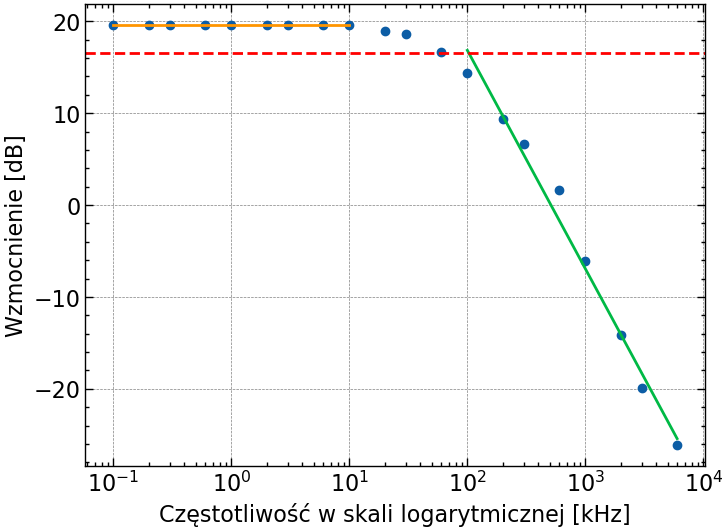

In [35]:
fig, ax = plt.subplots(1, 1)
ax.semilogx(frequency, amplification, 'o')
ax.semilogx(frequency[12:], np.log10(frequency[12:])*linFit.slope + linFit.intercept)
ax.semilogx(frequency[:9], np.log10(frequency[:9])*linFitFlat.slope + linFitFlat.intercept)
ax.axhline(y = _3dbLvl, color = 'red', linestyle = '--')
ax.set_xlabel('Częstotliwość w skali logarytmicznej [kHz]')
ax.set_ylabel('Wzmocnienie [dB]')